# Wine Quality Data Set


Abstract: Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

Data Set Characteristics:  Multivariate

Number of Instances: 4898

Area: Business

Attribute Characteristics: Real

Number of Attributes: 12

Date Donated: 2009-10-07

Associated Tasks: Classification, Regression

Missing Values? N/A

## Data Set Information:


There are two datasets that provide information on samples of red and white variants of the Portuguese "Vinho Verde" wine. Each sample of wine was rated for quality by wine experts and examined with physicochemical tests. Due to privacy and logistic issues, only data on these physicochemical properties and quality ratings are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


### Attribute Information:

Input variables (based on physicochemical tests):
<br>1 - fixed acidity
<br>2 - volatile acidity
<br>3 - citric acid
<br>4 - residual sugar
<br>5 - chlorides
<br>6 - free sulfur dioxide
<br>7 - total sulfur dioxide
<br>8 - density
<br>9 - pH
<br>10 - sulphates
<br>11 - alcohol
<br>Output variable (based on sensory data):
<br>12 - quality (score between 0 and 10)

#### Which of the following questions would be relevant to this dataset?

What chemical characteristics are most important in predicting the quality of wine?

Is a certain type of wine (red or white) associated with higher quality?

Do wines with higher alcoholic content receive better ratings?

Do sweeter wines (more residual sugar) receive better ratings?

What level of acidity is associated with the highest quality?


In [1]:
import pandas as pd

In [2]:
df_red = pd.read_csv("winequality-red.csv", sep = ';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_white = pd.read_csv("winequality-white.csv", sep = ';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Assessing Data

Using Pandas, explore winequality-red.csv and winequality-white.csv in the Jupyter notebook below to answer quiz questions 

below the notebook about these characteristics of the datasets:

number of samples in each dataset

number of columns in each dataset

features with missing values

duplicate rows in the white wine dataset

number of unique values for quality in each dataset

mean density of the red wine dataset

In [4]:
# How many samples of red wine are there? # Number of Rows
df_red.shape[0]

1599

In [5]:
# How many samples of white wine are there?
df_white.shape[0]

4898

In [6]:
# How many columns are in white wine?
df_white.shape[1]

12

In [7]:
# How many columns are in red wine?
df_red.shape[1]

12

In [8]:
# Which features have missing values?
df_red.isnull().any() # .isnull().any() generates a boolean array (True if the column has a missing value, False otherwise)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [9]:
# Which features have missing values?
print(df_white.isnull().any()) # .isnull().any() generates a boolean array (True if the column has a missing value, False otherwise)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [10]:
# How many duplicate rows are in the white wine dataset?
# You can count the number of duplicate rows by counting True in pandas. Series obtained with duplicated() . 
# The number of True can be counted with sum() method. If you want to count the number of False 
# (= the number of non-duplicate rows), you can invert it with negation ~ and then count True with sum()
print(df_white.duplicated().sum())

937


### Are duplicate rows in these datasets significant/ need to be dropped?
#### Not necessarily



In [11]:
# How many unique values of quality are in the red wine dataset?
print((~df_red['quality'].duplicated()).sum())

6


In [12]:
# How many unique values of quality are in the white wine dataset?
print((~df_white['quality'].duplicated()).sum())

7


### Quick Numpy Presentation 

In [13]:
# What is the mean density in the red wine dataset?
print(df_red['density'].mean())

0.9967466791744831


#### To analyze our data more efficiently, let's combine the red and white data sets into one data frame.

Before we do this, we need to add a new feature or column to each data frame that indicates whether the wine is red or white.

This way we will preserve this characteristic for each sample when the data frames are combined.

#### One way we can do this is by creating an array using NumPy and add that as a column into each data frame.
Let's learn about NumPy and how we can use it to do this.

NumPy is short for numerical Python and is designed for efficient scientific computation. It's built on top of the programming language C, which works at a lower level on our computer.

Pandas is built on top of NumPy which is why it's so fast with all these computations for functions like Describe.
If you try doing these computations in plain Python, it's much slower.

In [14]:
# Here's an example, calculating the mean for an array of 100 million values. 
import numpy as np
# This generates an array of 100 million random floats between zero and one.
a = np.random.random(100000000)
# We could also type in 1e8 to make this clear. Looks like that provide the float when it requires an int.
a = np.random.random(int(1e8))

In [15]:
# Let's see how long it takes standard Python to compute the mean of this array.
import time
start = time.time()
sum(a) / len(a)
print(time.time() - start, 'seconds')

11.7561776638031 seconds


In [16]:
# Okay, so a little more than 10 seconds.
# Now let's see how long it takes NumPy.
import time
start = time.time()
np.mean(a)
print(time.time() - start, 'seconds')

0.14661049842834473 seconds


That is almost instant. Isn't that cool? Imagine how much it speeds
up the process when there is much more computation happening.

For example, let's say we are engineering a whole new feature or column which you compute by
multiplying the values in two columns together and divide by the values in another for each row.

Unlike NumPy, plain Python will require a massively long loop through all the rows to compute
a new value for each row. 

The main object we work with in NumPy is a multi-dimensional array 
of values of all the same data type. These arrays, along with many useful functions in NumPy,
optimize and simplify operations on data. You'll learn more about NumPy arrays later.
In the next section, you'll use NumPy to create an array for a new color column for the red and white data frames.

# Appending Data

You can combine the red and white datasets to make your analysis more efficient. Use NumPy to create a new column that preserves color information, and then use pandas to combine the dataframes.

First, import the necessary packages and load `winequality-red.csv` and `winequality-white.csv`.

In [17]:
# import numpy and pandas
import pandas as pd
import numpy as np

# load red and white wine datasets
red_df = pd.read_csv('winequality-red.csv', sep = ';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
white_df = pd.read_csv('winequality-white.csv', sep = ';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function. Take a look and try it yourself.

In [19]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])
print(color_red)
# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])
print(color_white)

['red' 'red' 'red' ... 'red' 'red' 'red']
['white' 'white' 'white' ... 'white' 'white' 'white']


Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [20]:
red_df['color'] = color_red
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Do the same for the white dataframe and use `head()` to confirm the change.

In [21]:
white_df ['color'] = color_white
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards. Make sure to save your work in this notebook! You'll come back to this later.

In [22]:
print("red_df shape: ", red_df.shape)
print("white_df shape: ", white_df.shape)
# append dataframes
wine_df = white_df.append(red_df)
print("wine_df shape: ", wine_df.shape)
# view dataframe to check for success
wine_df.head()

red_df shape:  (1599, 13)
white_df shape:  (4898, 13)
wine_df shape:  (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Save Combined Dataset
Save your newly combined dataframe as `winequality_edited.csv`. Remember, set `index=False` to avoid saving with an unnamed column!

In [23]:
wine_df.to_csv('winequality_edited.csv', index = False)

### Practicing How To Rename A Column

To rename a columns in the previous lesson, we set df.columns to a new list.

Right now, we just need to change one of the column labels. If we try to do that by setting one value of
df.columns by indexing it like this, we get an error. Index does not support mutable operations:

wine_df.columns[6] = 'total_sulfur_dioxide'

This just means, that this column label array is something we can't modify. And since we can't modify it,
we'd have to reassign the whole thing to a new list like this:

new_labels = list(wine_df.columns)
<br/>new_labels[6] = 'total_sulfur_dioxide'
<br/>wine_df.columns = new_labels

Although this worked, this seems like a lot of work to change just one column name.
We could do this better by using a method called rename. Look at the Stack Overflow page and try renaming
the columns with this method rename()
<br/>https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe
#### wine_df = wine_df.rename(columns = {'total sulfur dioxide' : 'total_sulfur_dioxide'})


# Exploring with Visuals
Use the notebook below to perform exploratory data analysis on your newly combined dataframe. Create some visuals to answer these quiz questions below the notebook.

Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol

Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

# EDA with Visuals
Create visualizations to answer the quiz questions below this notebook. Use the `winequality_edited.csv` dataset, which you should've created  in the previous concept: *Appending Data (cont.)*.

In [24]:
wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Histograms for Various Features

#### Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right?
#### Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol

In [25]:
# matplotlib.pyplot is a module in Matplotlib, and it is a collection of functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 
%matplotlib notebook

<IPython.core.display.Javascript object>


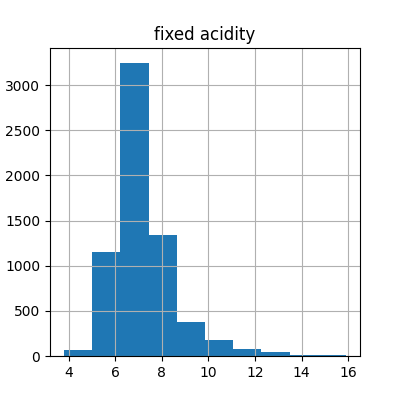

In [26]:
#  Fixed Acidity
wine_df.hist('fixed acidity', figsize = (4,4));

<IPython.core.display.Javascript object>


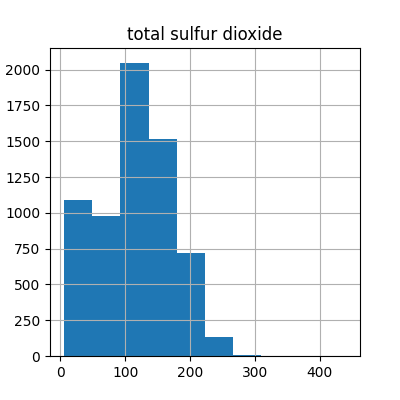

In [27]:
# Total Sulfur Dioxide(
wine_df.hist('total sulfur dioxide', figsize = (4,4));

<IPython.core.display.Javascript object>


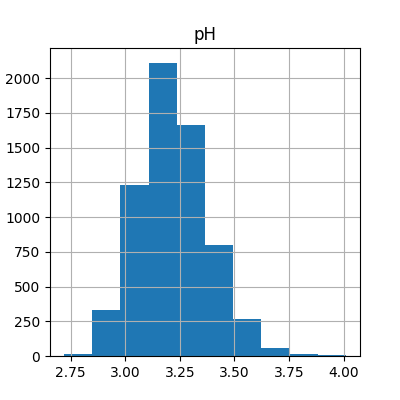

In [28]:
# pH
wine_df.hist('pH', figsize = (4,4));

<IPython.core.display.Javascript object>


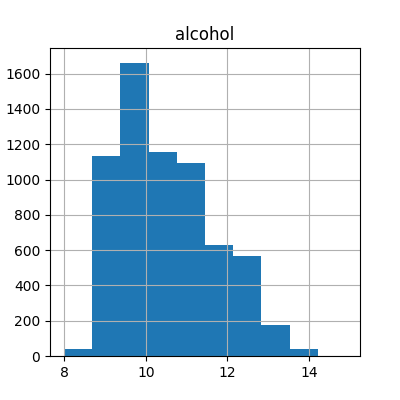

In [29]:
# Alcohol
wine_df.hist('alcohol', figsize = (4,4));

### Based on histograms of columns in this dataset, which feature variables appear skewed to the right?
> Fixed Acidity and Alcohol

### Scatterplots of Quality Against Various Features

#### which of the following is most likely to have a positive impact on quality? 
#### Volatile Acidity, Residual Sugar, pH, Alcohol

<IPython.core.display.Javascript object>


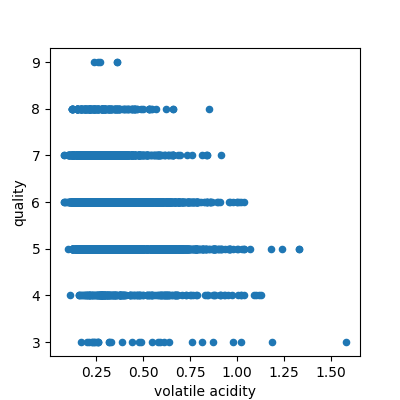

In [30]:
# Volatile Acidity
wine_df.plot(x = 'volatile acidity', y = 'quality', kind = 'scatter', figsize = (4, 4));

<IPython.core.display.Javascript object>


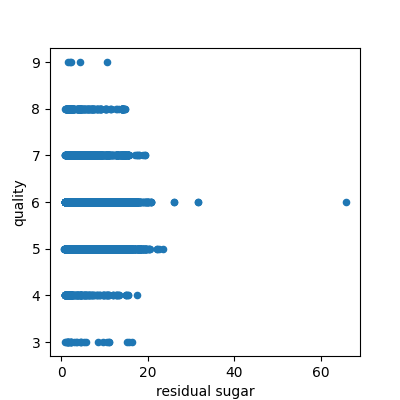

In [31]:
# Residual Sugar
wine_df.plot(x = 'residual sugar', y = 'quality', kind = 'scatter', figsize = (4, 4));

<IPython.core.display.Javascript object>


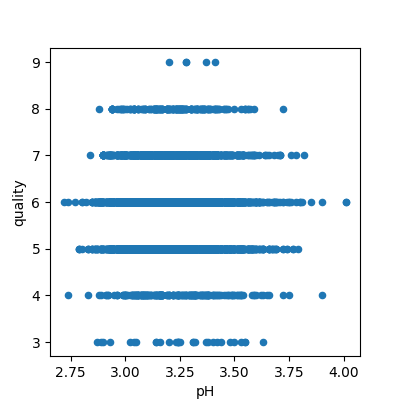

In [32]:
# pH
wine_df.plot(x = 'pH', y = 'quality', kind = 'scatter', figsize = (4, 4));

<IPython.core.display.Javascript object>


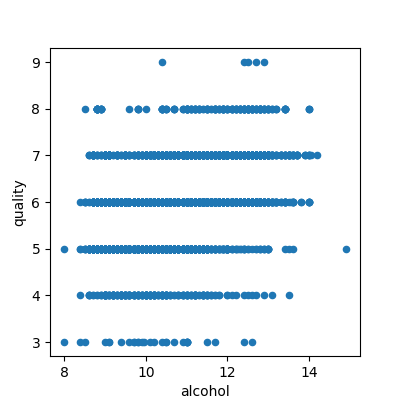

In [33]:
# Alcohol
wine_df.plot(x = 'alcohol', y = 'quality', kind = 'scatter', figsize = (4, 4));

Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality?
> Alcohol



## Pandas Groupby

Group By is one of my favorite functions in pandas.

It let's you group your data and aggregate information about
those groups or perform group specific transformations.

In this section, we'll focus on using GroupBy to
get summary statistics about different groups in our data.

Let's open the combined wine quality data frame we just created.
Previously, we learn that we can get summary statistics
on the whole dataset with functions like describe or mean.

In [34]:
import pandas as pd

wine_df = pd.read_csv('winequality_edited.csv')

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [35]:
# From this, I can find information like the mean pH for all the samples in the data set.

wine_df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

But, what if I wanted to find the mean for each quality rating?

For example, the mean pH level for all samples of the quality rating of seven.
We could use groupby combined with the mean function to do this.

With this, we can find the mean pH level for
all samples with a quality rating of seven here.

In [36]:
wine_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


We could even split the dataset with multiple columns to groupby,
by providing a list.

These are means of all of the other features grouped by quality and <b>then</b> color.
Here, we see separate means for the pH level of
all the red and white samples with a quality of seven.


In [37]:
type
wine_df.groupby(['quality', 'color']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

If you don't want quality or color to be made as the index,
you could set as_index to false.

In [38]:
wine_df.groupby(['quality', 'color'], as_index = False).mean()

,quality,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,white,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,white,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,white,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


If you're only interested in one of the columns,
like the pH, you could index the groups like this.

In [39]:
wine_df.groupby(['quality', 'color'], as_index = False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898


#### Next, you'll learn groupby to draw some conclusions about this dataset.

## Drawing Conclusions Using Groupby

In the notebook below, you're going to investigate two questions about this data using pandas' groupby function. Here are tips for answering each question:

### Q1: Is a certain type of wine (red or white) associated with higher quality?
For this question, compare the average quality of red wine with the average quality of white wine with groupby. To do this group by color and then find the mean quality of each group.

### Q2: What level of acidity (pH value) receives the highest average rating?
This question is more tricky because unlike color, which has clear categories you can group by (red and white) pH is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. pandas' cut function let's you "cut" data in groups. Using this, create a new column called acidity_levels with these categories:

<b>Acidity Levels:</b>

<ol>
<li>High: Lowest 25% of pH values</li>
<li>Moderately High: 25% - 50% of pH values</li>
<li>Medium: 50% - 75% of pH values</li>
<li>Low: 75% - max pH value</li>
</ol>
Here, the data is being split at the 25th, 50th, and 75th percentile. Remember, you can get these numbers with pandas' describe()! After you create these four categories, you'll be able to use groupby to get the mean quality rating for each acidity level.

# Drawing Conclusions Using Groupby

Use `winequality_edited.csv`. You should've created this data file in the previous section: *Appending Data (cont.)*.

In [40]:
# Load dataset
import pandas as pd
df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Is a certain type of wine associated with higher quality?

In [41]:
# Find the mean quality of each wine type (red and white) with groupby
df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### QUESTION 1 OF 2
Is the mean quality of red wine greater than, less than, or equal to that of white wine?

> Less

# What level of acidity receives the highest average rating? (groupby)

In [42]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [43]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [44]:
# Labels for the four acidity level groups
bin_names = ['High', 'Moderately High', 'Medium', 'Low'] # Name each acidity level category

In [45]:
# Creates acidity_levels column based on the values of the pH column! HOW COOL IS THAT!!!
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)
df['acidity_levels']
# Checks for successful creation of this column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High


In [46]:
# Find the mean quality of each acidity level with groupby
df.groupby(['acidity_levels'])['quality'].mean()

acidity_levels
High               5.783343
Moderately High    5.784540
Medium             5.850832
Low                5.859593
Name: quality, dtype: float64

In [47]:
# Save changes for the next section
df.to_csv('winequality_edited.csv', index=False)

### QUESTION 2 OF 2
What level of acidity receives the highest mean quality rating?

> Low

# Pandas Query

Another useful function that we’re going to use is pandas' query function.

In the previous lesson, we selected rows in a dataframe by indexing with a mask. Here are those same examples, along with equivalent statements that use <code>query()</code>


<code># selecting malignant records in cancer data
df_m = df[df['diagnosis'] == 'M']
df_m = df.query('diagnosis == "M"')</code>


<code># selecting records of people making over $50K
df_a = df[df['income'] == ' >50K'] # The income column has values of '>50K' and '<50k'
df_a = df.query('income == " >50K"')</code>

The examples above filtered columns containing strings. You can also use query to filter columns containing numeric data like this.

<code># selecting records in cancer data with radius greater than the median
df_h = df[df['radius'] > 13.375]
df_h = df.query('radius > 13.375')</code>

# Drawing Conclusions Using Query
In the notebook below, you're going to investigate two questions about this data using pandas' query function. Here are tips for answering each question:

### Q1: Do wines with higher alcoholic content receive better ratings?
To answer this question, use query to create two groups of wine samples:

Low alcohol (samples with an alcohol content less than the median)
High alcohol (samples with an alcohol content greater than or equal to the median)
Then, find the mean quality rating of each group.

### Q2: Do sweeter wines (more residual sugar) receive better ratings?
Similarly, use the median to split the samples into two groups by residual sugar and find the mean quality rating of each group.

# Drawing Conclusions Using Query

In [48]:
# Load 'winequality_edited.csv,' a file you previously created
# in this workspace and worked with in the concepts
# "Appending Data(cont.)" and "Exploring with Visuals"
import pandas as pd
df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High


### Do wines with higher alcoholic content receive better ratings?

In [49]:
# get the median amount of alcohol content
alcohol_median = df['alcohol'].median()
alcohol_median ###

10.3

#### XXX CAN'T USE A VARIABLE NAME TO FILTER INSIDE THE QUERY METHOD! 
#### YOU HAVE TO PUT THE COLUMN NAME AND STRAIGHT VALUE YOU WANT TO FILTER BY THEM! XXX
## Wrong!
## According to the documentation, you can reference variables using @

In [50]:
# select samples with alcohol content less than the median
low_alcohol = df.query('alcohol < @alcohol_median')
low_alcohol.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High


In [51]:
# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query('alcohol >= 10.3')
high_alcohol.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white,Medium
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,white,High
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5,white,Moderately High
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,white,Low
15,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,white,Medium


# ensure these queries included each sample exactly once

In [52]:
# ensure these queries included each sample exactly once
num_samples = df.shape[0] # Original DataFrame
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [53]:
# get mean quality rating for the low alcohol and high alcohol groups
high_alcohol['quality'].mean() >= low_alcohol['quality'].mean()

True

#### QUESTION 1 OF 2
Do wines with higher alcoholic content generally receive better ratings?
> Yes

### Do sweeter wines receive better ratings?

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High


In [55]:
# get the median amount of residual sugar
sugar_median = df['residual sugar'].mean()
sugar_median

5.443235339387428

# in pandas you can escape column names with backticks so you can do:

In [56]:
# select samples with residual sugar less than the median
low_sugar = df.query('`residual sugar` < @sugar_median')
low_sugar.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white,Medium
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,white,High
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,white,Moderately High


In [57]:
# select samples with residual sugar greater than or equal to the median
high_sugar = df.query('`residual sugar` >= @sugar_median')
high_sugar.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium


In [58]:
# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [59]:
# get mean quality rating for the low sugar and high sugar groups
high_sugar['quality'].mean() > low_sugar['quality'].mean()

False

# Type & Quality Plot - Part 1

Now, that we've made some conclusions,
we can create visualizations to display our findings regarding
the associations between wine quality and different properties of wine.

In [60]:
# I've already imported pandas and loaded our edited wine quality data.
import pandas as pd
# Let's also include the matplotlib inline statement to view plots in our notebook
%matplotlib inline
wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High


Let's create visualizations, to help us understand if a certain type of wine,
red or white, is associated with higher quality.

In the previous section,
we used groupby to find the mean wine quality for each color.
We're going to use these results for these visualizations.

To do this, we can add plot to the end of the groupby statement.

We can also specify parameters for the title,
as well as the color and transparency of the bars.

Let's actually create a separate list for colors to make this cleaner.

This makes sense, when there are multiple colors you want to graph with multiple times.


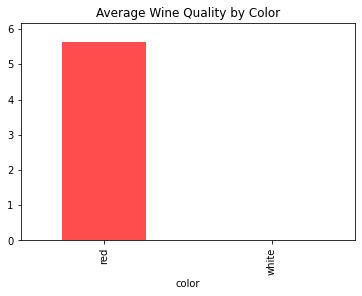

In [61]:
colors = ['red', 'white']
wine_df.groupby('color')['quality'].mean().plot(kind = 'bar', title = 'Average Wine Quality by Color', color = colors, alpha = .7);

For our final visualizations,
we should have appropriate labels for both the x and y axis.
We also don't want our white bar disappearing into a white background.
At this point, we can't get away with using only pandas.

Let's add matplotlib. Pyplot is a module in matplotlib we'll use to create our plots.

Standard convention is to import it and alias it as plt.

Let's also import seaborn.
Seaborn standard alias is sns.
Even if we don't use seaborn directly,
it adds additional formatting to our plots that make them more
aesthetically pleasing, than standard matplotlib.

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

Now, that we have matplotlib, we can set x and y axis labels like this.

Our graph looks nicer and the white part doesn't blend into the background.

Although this works, that first line of code is pretty long and difficult to read.
Let's assign the groupby statement to a new object.
This won't change the visualization itself,
It just makes our lives easier.

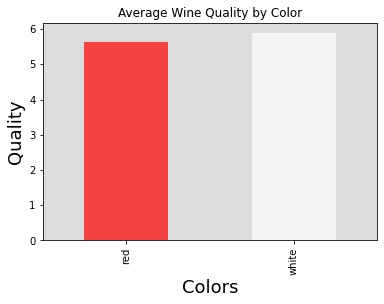

In [63]:
colors = ['red', 'white']
color_means = wine_df.groupby('color')['quality'].mean()
color_means.plot(kind = 'bar', title = 'Average Wine Quality by Color', color = colors, alpha = .7).set_facecolor('#DCDCDC');
plt.xlabel('Colors', fontsize = 18);
plt.ylabel('Quality', fontsize = 18);

Although, this visual shows us that
the white wine samples has slightly higher average quality ratings,
it would be nice if we could get more details on where that's coming from.

In [64]:
# Let's put a more detailed bar chart, counts for each quality rating by color.
# We can groupby quality and color to do this.
counts = wine_df.groupby(['quality', 'color']).count()
counts # Because these are counts, the values for all the columns will be the same.

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              681               681          681             681   
        white           1457              1457         1457            1457   
6       red              638               638          638             638   
        white           2198              2198         2198            2198   
7       red              199               199          199             199   
        white            880               880          880             880   
8       red               18                18           18              18   
        white            175               175          175             175   
9       white              5                 5            5               5   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        163                  163                   163      163   
5       red          681                  681                   681      681   
        white       1457                 1457                  1457     1457   
6       red          638                  638                   638      638   
        white       2198                 2198                  2198     2198   
7       red          199                  199                   199      199   
        white        880                  880                   880      880   
8       red           18                   18                    18       18   
        white        175                  175                   175      175   
9       white          5                    5                     5        5   

                 pH  sulphates  alcohol  acidity_levels  
quality color                                            
3       red      10         10       10              10  
        white    20         20       20              20  
4       red      53         53       53              53  
        white   163        163      163             163  
5       red     681        681      681             681  
        white  1457       1457     1457            1457  
6       red     638        638      638             638  
        white  2198       2198     2198            2197  
7       red     199        199      199             199  
        white   880        880      880             880  
8       red      18         18       18              18  
        white   175        175      175             175  
9       white     5          5        5               5

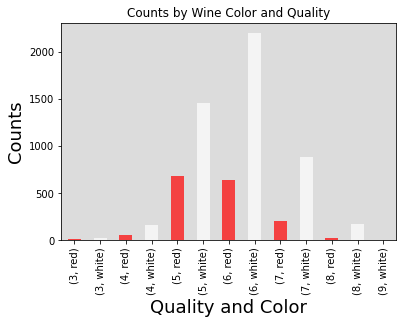

In [65]:
# So we'll just pick an arbitrary one.
counts = wine_df.groupby(['quality', 'color']).count()['pH']
colors = ['red', 'white']
counts.plot(kind = 'bar', title = 'Counts by Wine Color and Quality', color = colors, alpha = .7).set_facecolor('#DCDCDC');
plt.xlabel('Quality and Color', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);

That's close, but there are several things that can improve at this plot.
First, there's clearly more white samples than red samples.
So it's hard to make a fair comparison, we just count.
To balance this out,
let's divide each count by the total count for that color to use proportions instead.

In [66]:
totals = wine_df.groupby('color').count()['pH']

In [67]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
counts

quality  color
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: pH, dtype: int64

In [68]:
proportions = counts / totals
proportions

quality  color
3        red      0.006254
         white    0.004083
4        red      0.033146
         white    0.033279
5        red      0.425891
         white    0.297468
6        red      0.398999
         white    0.448755
7        red      0.124453
         white    0.179665
8        red      0.011257
         white    0.035729
9        white    0.001021
Name: pH, dtype: float64

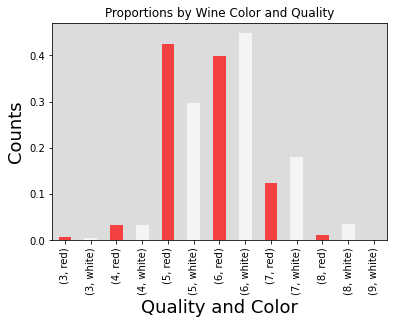

In [69]:
colors = ['red', 'white']
proportions.plot(kind = 'bar', title = 'Proportions by Wine Color and Quality', color = colors, alpha = .7).set_facecolor('#DCDCDC');
plt.xlabel('Quality and Color', fontsize = 18);
plt.ylabel('Counts', fontsize = 18);

That looks a lot better.
We can see that for the lower ratings: three, four and five,
red samples show higher proportions,
and for the higher ratings: six, seven,
eight and nine, white samples have higher proportions.
The data we're showing looks great,

but the tick labels on the X axis look messy,
and it would be nicer to have the red and white bar for each rating next to each other.
We're also missing a spot for the red samples with a quality rating of nine.
Although that number is zero,
that spot should still be there.
Since there seems to be a lot of customization needed,
it would make more sense to plot directly on Matplotlib than with pandas.
Before we move on, let's learn more about Matplotlib.

# Matplotlib Example
Matplotlib gives us much more control over our visualizations.



# Creating a Bar Chart Using Matplotlib

let's walk through a simple example using Matplotlib to create a bar chart. We can use pyplot's bar function for this.

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

There are two required arguments in pyplot's `bar` function: the x-coordinates of the bars, and the heights of the bars.

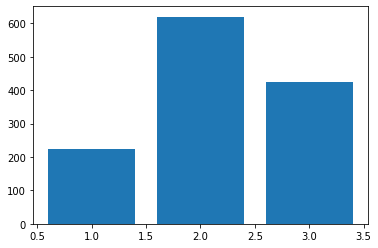

In [71]:
plt.bar([1, 2, 3], [224, 620, 425]);

You can specify the x tick labels using pyplot's `xticks` function, or by specifying another parameter in the `bar` function. The two cells below accomplish the same thing.

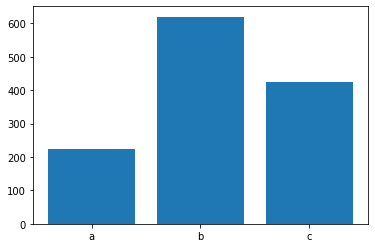

In [72]:
# plot bars
plt.bar([1, 2, 3], [224, 620, 425])

# specify x coordinates of tick labels and their labels
plt.xticks([1, 2, 3], ['a', 'b', 'c']);

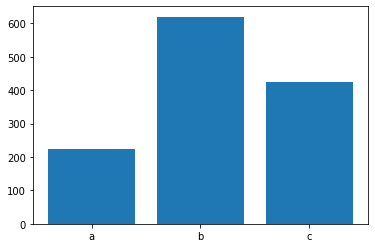

In [73]:
# plot bars with x tick labels
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c']);

Set the title and label axes like this.

# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [74]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('winequality_edited.csv')

### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [75]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()
print(mean_quality_low, mean_quality_high)

5.475920679886686 6.146084337349397


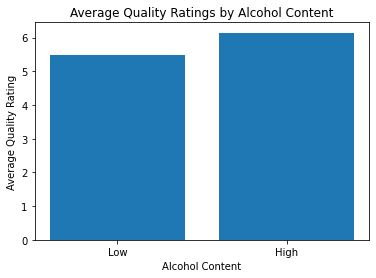

In [76]:
# Create a bar chart with proper labels
locations = [1, 2] # The X axis: since we have 2 bars to draw; so, we used 2 locations only.
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [77]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High


In [78]:
# Use query to select each group and get its mean quality
median_low_sugar = df['residual sugar'].median()
median_low_sugar

3.0

In [79]:
low_sugar = df.query('`residual sugar` < {}'.format(median_low_sugar))
low_sugar.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white,Medium
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5,white,High
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5,white,Moderately High


In [80]:
high_sugar = df.query('`residual sugar` >= {}'.format(median_low_sugar))
high_sugar.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,High
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Moderately High
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium


In [81]:
mean_low_sugar = low_sugar['quality'].mean()
mean_low_sugar

5.808800743724822

In [82]:
mean_high_sugar = high_sugar['quality'].mean()
mean_high_sugar

5.82782874617737

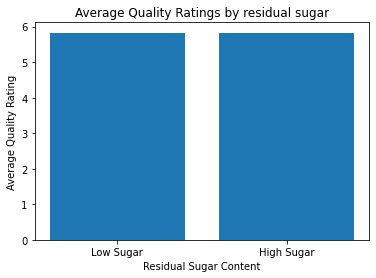

In [83]:
# Create a bar chart with proper labels
locations = [1, 2] # The X axis: since we have 2 bars to draw; so, we used 2 locations only.
heights = [mean_low_sugar, mean_high_sugar]
labels = ['Low Sugar', 'High Sugar']
plt.bar(locations, heights, tick_label = labels);
plt.title('Average Quality Ratings by residual sugar');
plt.xlabel('Residual Sugar Content');
plt.ylabel('Average Quality Rating');

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [84]:
# Use groupby to get the mean quality for each acidity level
mean_acidity = df.groupby('acidity_levels')['quality'].mean()

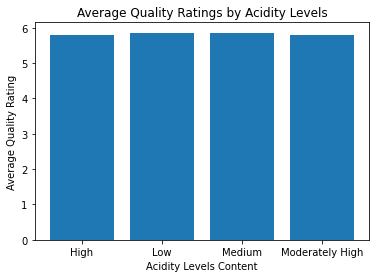

In [85]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = mean_acidity.values
labels = mean_acidity.index
plt.bar(locations, heights, tick_label = labels);
plt.title('Average Quality Ratings by Acidity Levels');
plt.xlabel('Acidity Levels Content');
plt.ylabel('Average Quality Rating');

### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function for this.

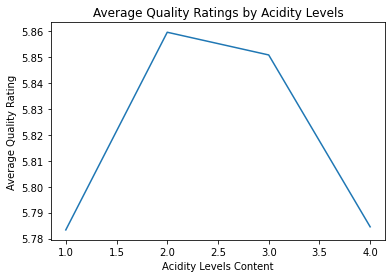

In [86]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = mean_acidity.values
plt.plot(locations, heights);
plt.title('Average Quality Ratings by Acidity Levels');
plt.xlabel('Acidity Levels Content');
plt.ylabel('Average Quality Rating');

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?

# Type & Quality Plot with Matplotlib

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

wine_df = pd.read_csv('winequality_edited.csv')

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [88]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [89]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [90]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [91]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [92]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

Now let’s create the plot.

Oh, that didn't work because we're missing a red wine value for a the 9 rating. Even though this number is a 0, we need it for our plot. Run the last two cells after running the cell below.

In [93]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64